In [1]:
import polars as pl
import matplotlib.pyplot as plt
file_path = r'C:\Users\ramya\Downloads\openpolicing.parquet'
lf = pl.scan_parquet(file_path)

In [2]:
la_data = lf.filter(pl.col('county_name') == 'Los Angeles').collect()
la_data

date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,violation,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,service_area,officer_race,lat,lng,geocode_source,beat,division,officer_sex,disposition,posted_speed,district,precinct,speed,contraband_other,vehicle_type,officer_age,officer_years_of_service,unit,notes,sector,subsector,officer_assignment,use_of_force_description,department_id,contraband_alcohol,zone,region,neighborhood,reporting_area,reason_for_arrest,subdistrict,police_grid_number,use_of_force_reason,charged_speed,subdivision,substation
date,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f32,f32,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2009-07-04,null,null,"""Los Angeles""",null,"""hispanic""","""male""",null,"""California Highway Patrol""","""vehicular""","""FALSE""","""FALSE""","""FALSE""","""summons""",null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Mechanical or Nonmoving Violat…","""Mechanical or Nonmoving Violat…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""white""","""male""",null,"""California Highway Patrol""","""vehicular""","""FALSE""","""FALSE""","""FALSE""","""summons""",null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Moving Violation (VC)""","""Moving Violation (VC)""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""hispanic""","""male""",null,"""California Highway Patrol""","""vehicular""",null,null,null,null,null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Motorist / Public Service""","""Motorist / Public Service""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""black""","""male""",null,"""California Highway Patrol""","""vehicular""",null,null,null,null,null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Motorist / Public Service""","""Motorist / Public Service""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2009-07-04,null,null,"""Los Angeles""",null,"""black""","""male""",null,"""California Highway Patrol""","""vehicular""",null,null,null,null,null,null,null,null,"""FALSE""","""FALSE""",null,null,null,null,"""Motorist / Public Service""","""Motorist / Public Service""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""West Los Angeles""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2016-06-30,null,null,"""Los Angeles""",null,"""asian/pacific islander""","""male""",null,"""California Highway Patrol""","""vehicular""","""TRUE""","""FALSE""","""FALSE""","""arrest""",null,null,null,null,"""

In [9]:
columns = list(la_data.schema.keys())
options = {}
for col in columns:
    val = la_data.lazy().select(pl.col(col).unique()).collect()
    options[col] = val
options

{'date': shape: (2_545, 1)
 ┌────────────┐
 │ date       │
 │ ---        │
 │ date       │
 ╞════════════╡
 │ 2009-07-01 │
 │ 2009-07-02 │
 │ 2009-07-03 │
 │ 2009-07-04 │
 │ 2009-07-05 │
 │ …          │
 │ 2016-06-26 │
 │ 2016-06-27 │
 │ 2016-06-28 │
 │ 2016-06-29 │
 │ 2016-06-30 │
 └────────────┘,
 'time': shape: (1, 1)
 ┌──────┐
 │ time │
 │ ---  │
 │ str  │
 ╞══════╡
 │ null │
 └──────┘,
 'location': shape: (1, 1)
 ┌──────────┐
 │ location │
 │ ---      │
 │ str      │
 ╞══════════╡
 │ null     │
 └──────────┘,
 'county_name': shape: (1, 1)
 ┌─────────────┐
 │ county_name │
 │ ---         │
 │ str         │
 ╞═════════════╡
 │ Los Angeles │
 └─────────────┘,
 'subject_age': shape: (1, 1)
 ┌─────────────┐
 │ subject_age │
 │ ---         │
 │ str         │
 ╞═════════════╡
 │ null        │
 └─────────────┘,
 'subject_race': shape: (6, 1)
 ┌────────────────────────┐
 │ subject_race           │
 │ ---                    │
 │ str                    │
 ╞════════════════════════╡
 │ null  

In [12]:
to_use = la_data.select('district', 'subject_race', 'outcome').drop_nulls()
to_use

district,subject_race,outcome
str,str,str
"""West Los Angeles""","""hispanic""","""summons"""
"""West Los Angeles""","""white""","""summons"""
"""West Los Angeles""","""white""","""warning"""
"""West Los Angeles""","""white""","""warning"""
"""West Los Angeles""","""asian/pacific islander""","""warning"""
…,…,…
"""South Los Angeles""","""asian/pacific islander""","""arrest"""
"""South Los Angeles""","""white""","""warning"""
"""South Los Angeles""","""black""","""summons"""


Text(0.5, 1.0, 'Majority Outcome Data')

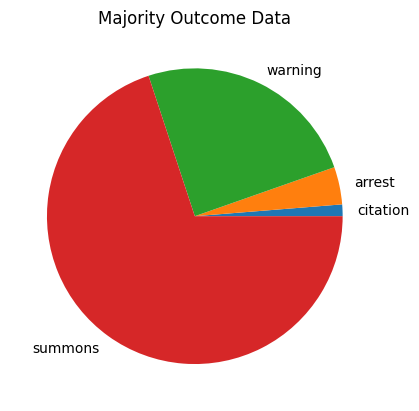

In [32]:
# majority outcome
labels = to_use.lazy().select(pl.col('outcome').unique()).collect().to_numpy().flatten()
data = []
for label in labels:
    val = to_use.filter(pl.col('outcome') == label).shape[0]
    data.append(val)

plt.pie(data, labels=labels)
plt.title('Majority Outcome Data')

Text(0.5, 1.0, 'District Report Data')

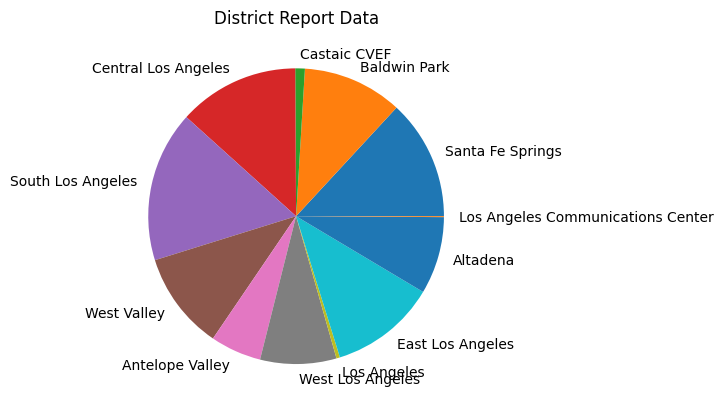

In [31]:
# majority district
labels = to_use.lazy().select(pl.col('district').unique()).collect().to_numpy().flatten()
data = []
for label in labels:
    val = to_use.filter(pl.col('district') == label).shape[0]
    data.append(val)

plt.pie(data, labels=labels)
plt.title('District Report Data')

Text(0.5, 1.0, 'Summons by Race Data')

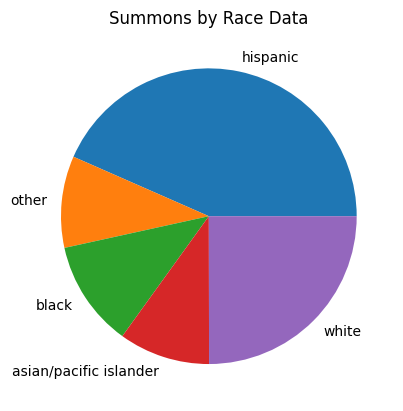

In [29]:
# which race takes majority of summons

summons_data = to_use.select(['subject_race', 'outcome']).filter(pl.col('outcome') == 'summons')
labels = summons_data.lazy().select(pl.col('subject_race').unique()).collect().to_numpy().flatten()
data = []
for label in labels:
    val = summons_data.filter(pl.col('subject_race') == label).shape[0]
    data.append(val)

plt.pie(data, labels=labels)
plt.title('Summons by Race Data')

Text(0.5, 1.0, 'Arrests by Race Data')

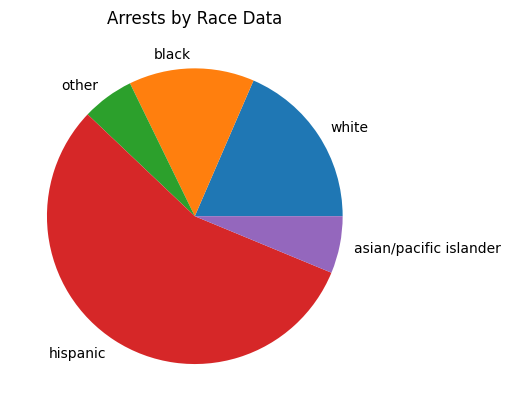

In [38]:
# which race takes majority of arrests

arrest_data = to_use.select(['subject_race', 'outcome']).filter(pl.col('outcome') == 'arrest')
labels = arrest_data.lazy().select(pl.col('subject_race').unique()).collect().to_numpy().flatten()
data = []
for label in labels:
    val = arrest_data.filter(pl.col('subject_race') == label).shape[0]
    data.append(val)

plt.pie(data, labels=labels)
plt.title('Arrests by Race Data')

Text(0.5, 1.0, 'Warnings by Race Data')

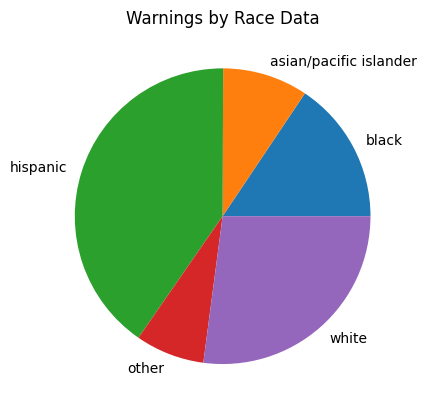

In [39]:
# which race takes majority of arrests

warning_data = to_use.select(['subject_race', 'outcome']).filter(pl.col('outcome') == 'warning')
labels = warning_data.lazy().select(pl.col('subject_race').unique()).collect().to_numpy().flatten()
data = []
for label in labels:
    val = warning_data.filter(pl.col('subject_race') == label).shape[0]
    data.append(val)

plt.pie(data, labels=labels)
plt.title('Warnings by Race Data')

Personal Note: as you can tell i really like pie charts :)